> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No-show appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limit">Limitations</a></li>    
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will analyze  the data of No-Show Appointments 'noshowappointments_may-2016.csv' dataset, and we will be interested in finding the factors that would affect the patient to show up for there appointments, and to know that we need to find the answer of some questions that would help to find the most affecting factors for not showing on the appointments like:
<br> 1) How would receiving an SMS affect the patient to show up on the appointment?
<br> 2) Would the age be a factor to make the patient miss his appointment?
<br> 3) Are the patients who are enrolled in a scholarship show up on the time of their appointment?
<br> 4) Would handicap be a fector that affects the patient to show on time?

In [44]:
# Import pandas, Numpy, seaborn and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>I started the project by importing pandas, numpy, matplotlib, and seaborn.
The next step I loaded the dataframe using .read_csv(), then I started to explore the dataframe using .head() function to check the values and to take a look at the data available, then I used .info() function to explore the data types, the index and to check if any columns have a missing data, then I used the .describe() function to explore the summary statistics of the dataframe, then I used .shape() to explore the size of the dataframe, then I used .hist(); to explore the histogram of the data frame.


> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [45]:
#load the dataframe
df = pd.read_csv('noshowappointments_may-2016.csv')

In [46]:
# loading the first row in the dataframe to dicover the dataframe and make sure that it's loaded and performing correct
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [47]:
# Exploring index,datatye and memory information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [48]:
# Exploring summary statistics of the dataframe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [49]:
# Exploring columns and rows in the dataframe
df.shape

(110527, 14)

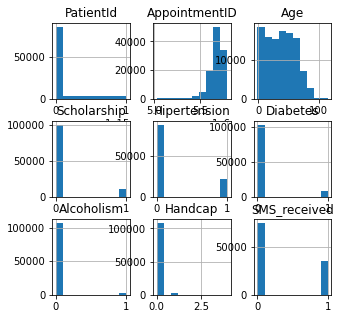

In [50]:
# Checking histogram for each column
df.hist(figsize=(5,5));

### Charts Description

The upper charts are to display the dataframe columns to explore the data for analysis and it displays the charts of patientId, AppointmentID, Age, Scholarship, ... etc

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 
> In this step I started to clean and narrow the dataframe to the columns that I’ll use in my analyze to make it more clear and easy to work with.
First I checked the dataframe if ant data was missing, and I confirmed that there were no data missing, then I used .drop() to drop the columns that I was not related to this analysis, after dropping the columns, I used .info() function to check my updated dataframe and to confirm that the changes took place.
After that I changed the type of the Appointment_day column from string to datetime type, to make it more readable and easy to be used if needed, then I renamed the columns to of No-Show to Noshow to avoid any errors would be caused by the ‘- ‘ in the code, then I used the .info method to confirm the updates, then I used .hist() to check the histograms of the dataframe after the updates.


In [51]:
# Drop the columns that is not needed in this analyss
df.drop(['PatientId', 'AppointmentID','ScheduledDay','Neighbourhood', 'Hipertension', 'Diabetes', 'Alcoholism'] , axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   AppointmentDay  110527 non-null  object
 2   Age             110527 non-null  int64 
 3   Scholarship     110527 non-null  int64 
 4   Handcap         110527 non-null  int64 
 5   SMS_received    110527 non-null  int64 
 6   No-show         110527 non-null  object
dtypes: int64(4), object(3)
memory usage: 5.9+ MB


In [52]:
# Check the dataframe after drop the columns that is not needed in this analysis
df.head()

,Gender,AppointmentDay,Age,Scholarship,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,0,0,0,No


In [53]:
# Convert the AppointmentDay type to date time to make it more readable and easier to work with
df[['AppointmentDay']] = df[['AppointmentDay']].apply(pd.to_datetime)
df.rename(columns={'No-show' : 'Noshow'}, inplace= True)
df.head()

,Gender,AppointmentDay,Age,Scholarship,Handcap,SMS_received,Noshow
0,F,2016-04-29 00:00:00+00:00,62,0,0,0,No
1,M,2016-04-29 00:00:00+00:00,56,0,0,0,No
2,F,2016-04-29 00:00:00+00:00,62,0,0,0,No
3,F,2016-04-29 00:00:00+00:00,8,0,0,0,No
4,F,2016-04-29 00:00:00+00:00,56,0,0,0,No


In [54]:
# Exploring index,datatye and memory information about the updated dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 2   Age             110527 non-null  int64              
 3   Scholarship     110527 non-null  int64              
 4   Handcap         110527 non-null  int64              
 5   SMS_received    110527 non-null  int64              
 6   Noshow          110527 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 5.9+ MB


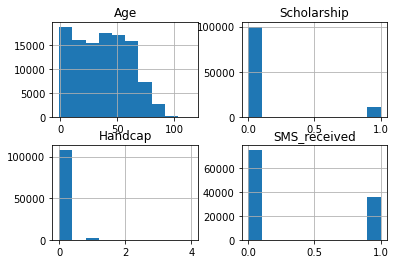

In [55]:
# Checking histogram for each column after clearing the dataframe
df.hist();

### Charts Description

The upper charts are to display the dataframe columns after cleaning to explore the data for analysis and start the exploratory process.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: How would receiving an SMS affect the patient to show up on the appointment?

In [56]:
# Creating Variables for patent who came and others who did not make it
show = df.Noshow == 'No'
noshow = df.Noshow == 'Yes'

In [57]:
# Checking the avreage of people who came and received SMS
df.SMS_received[show].mean()

0.2913341193542536

In [58]:
# Checking the avreage of people who did not show and received SMS
df.SMS_received[noshow].mean()

0.43837089475334917

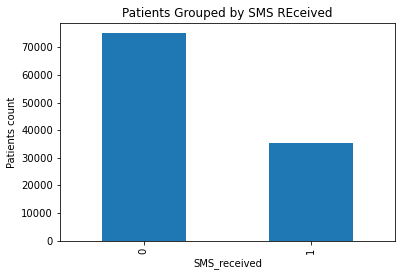

In [59]:
# Grouping by SMS Recieved
df.groupby(['SMS_received'])['Noshow'].count().plot(kind = 'bar').set_ylabel('Patients count')
mpl.title('Patients Grouped by SMS REceived');

### Chart Description

The upper bar chart displays the amuount of pateints who received SMS to these who didn't receive SMS

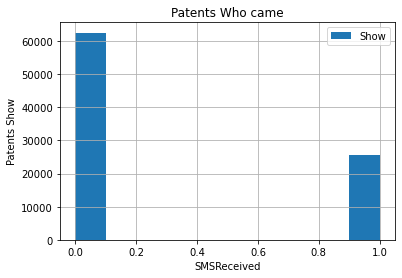

In [60]:
# Checking if recivung SMS affect the patient to show up 
df.SMS_received[show].hist(label = 'Show');
mpl.title('Patents Who came')
mpl.xlabel('SMSReceived')
mpl.ylabel('Patents Show')
mpl.legend();

### Chart Description

The upper histogram displays the patients who came to the appointment whether they received SMS or not, and it shows that the patients who came without reciving SMS are Much higher than the ones who recieved SMS

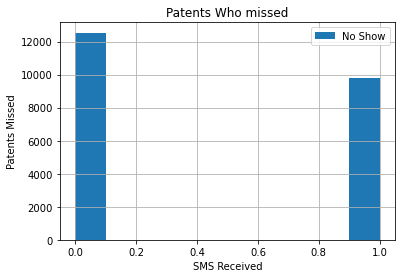

In [61]:
# Checking if recivung SMS affect the patient to show up 
df.SMS_received[noshow].hist(label = 'No Show');
mpl.title('Patents Who missed')
mpl.xlabel('SMS Received')
mpl.ylabel('Patents Missed')
mpl.legend();

### Chart Description

The upper histogram displays the patients who missed the appointment whether they received SMS or not, and it shows that the patients who missed without reciving SMS are higher than the ones who recieved SMS but not with abit difference.

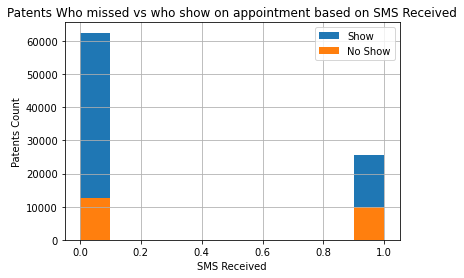

In [62]:
# Compare if recivung SMS affect the patient to show up 
df.SMS_received[show].hist(label = 'Show');
df.SMS_received[noshow].hist(label = 'No Show');
mpl.title('Patents Who missed vs who show on appointment based on SMS Received')
mpl.xlabel('SMS Received')
mpl.ylabel('Patents Count')
mpl.legend();

### Chart Description

The upper histogram displays the Patents Who missed their appointment vs who show on appointment, and it combines the last two charts and that to compare the resutls of the pateints, and that shows that the receiving SMS does not affect the pateints to show 

### Research Question 2: Would the age be a factor to make the patient miss his appointment?

In [63]:
# Checking the avreage of people who came and thier ages
df.Age[show].mean()

37.790064393252315

In [64]:
# Checking the avreage of people who came and their ages
df.Age[noshow].mean()

34.31766656212196

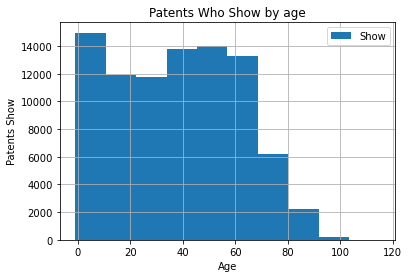

In [65]:
# Check how Age affect the patient to show up
df.Age[show].hist(label = 'Show');
mpl.title('Patents Who Show by age')
mpl.xlabel('Age')
mpl.ylabel('Patents Show')
mpl.legend();

### Chart Description

The upper histogram displays the patients who didn't miss and the ages of them, and it shows that children and new born patients and he ages between 38 and 70 are the most sector of coming to their appointments

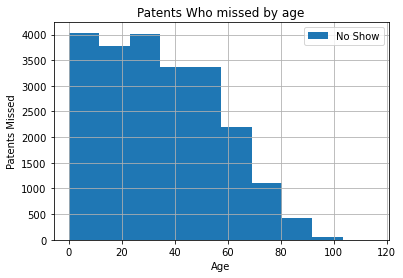

In [66]:
# Checking if recivung SMS affect the patient to show up 
df.Age[noshow].hist(label = 'No Show');
mpl.title('Patents Who missed by age')
mpl.xlabel('Age')
mpl.ylabel('Patents Missed')
mpl.legend();

### Chart Description

The upper histogram displays the patients who didn't miss and the ages of them, and it shows that patients in the age between  21 and about 35 are the most patients to miss their appointments.

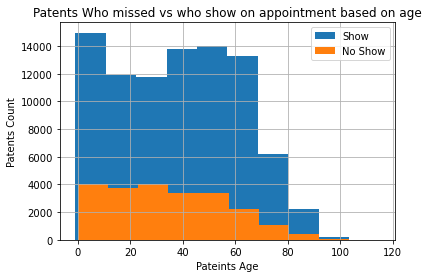

In [67]:
# Compare how Age affect the patient to show up
df.Age[show].hist(label = 'Show');
df.Age[noshow].hist(label = 'No Show');
mpl.title('Patents Who missed vs who show on appointment based on age')
mpl.xlabel('Pateints Age')
mpl.ylabel('Patents Count')
mpl.legend();

### Chart Description

The upper histogram displays the Patents Who missed their appointment vs who show on appointment based on the age, and it combines the last two charts and that to compare the resutls of the pateints, and that shows that patients in the age between  21 and about 35 are the most patients to miss their appointments, and children and new born patients and the ages between 38 and 70 are the most sector of coming to their appointments.

### Research Question 3: Are the patients who are enrolled in a scholarship show up on the time of thier appointment?

In [68]:
# Checking the avreage of people who came and inrolled in a scholarship
df.Scholarship[show].mean()

0.09390304734264465

In [69]:
# Checking the avreage of people who could not come and inrolled in a scholarship
df.Scholarship[noshow].mean()

0.11550696715802679

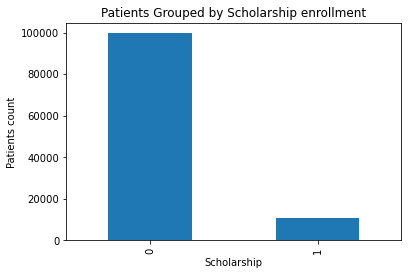

In [70]:
# Grouping by inrolled in scholarship
df.groupby(['Scholarship'])['Noshow'].count().plot(kind = 'bar').set_ylabel('Patients count')
mpl.title('Patients Grouped by Scholarship enrollment');

### Chart Description

The upper bar chart displays the patients who enrolled in the scholarship, and it shows that most of the pateints are not enrolled to the scholarship

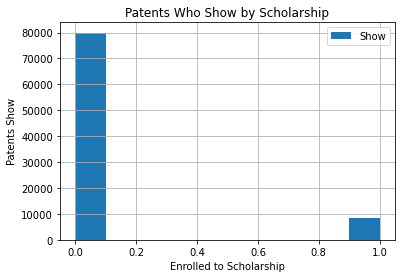

In [71]:
# Check if Scholarship affects the patient to show up
df.Scholarship[show].hist(label = 'Show');
mpl.title('Patents Who Show by Scholarship')
mpl.xlabel('Enrolled to Scholarship')
mpl.ylabel('Patents Show')
mpl.legend();

### Chart Description

The upper histogram displays the patients who enrolled in the scholarship and how it affects the patients to show for their appointments, and it shows that most of the pateints who are not enrolled to the scholarship are showing for their appointments compared to the enrolled patients.

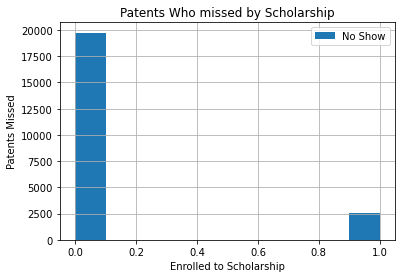

In [72]:
# Check if Scholarship affects the patient to show up
df.Scholarship[noshow].hist(label = 'No Show');
mpl.title('Patents Who missed by Scholarship')
mpl.xlabel('Enrolled to Scholarship')
mpl.ylabel('Patents Missed')
mpl.legend();

### Chart Description

The upper histogram displays the patients who enrolled in the scholarship and how it affects the patients to show for their appointments, and it shows that most of the pateints who are not enrolled to the scholarship are missing their appointments compared to the enrolled patients.

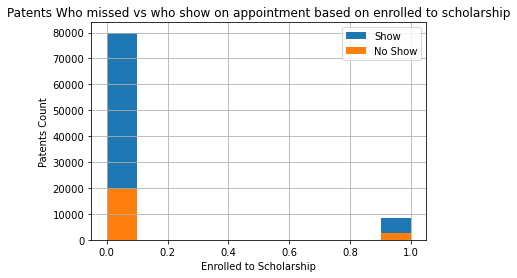

In [73]:
# Compare if Scholarship affects the patient to show up
df.Scholarship[show].hist(label = 'Show');
df.Scholarship[noshow].hist(label = 'No Show');
mpl.title('Patents Who missed vs who show on appointment based on enrolled to scholarship')
mpl.xlabel('Enrolled to Scholarship')
mpl.ylabel('Patents Count')
mpl.legend();

### Chart Description

The upper histogram displays the Patents Who missed their appointment vs who show on appointment based on enrolling to scholarship, and it combines the last two charts and that to compare the resutls of the pateints, and I found that patients who enrolled to scholarship are more commited to show on their appointment

### Research Question 4: Would handicap be a fector that affects the patient to show on time?

In [74]:
# Checking the avreage of people who came and inrolled in a scholarship
df.Handcap[show].mean()

0.022741701432976602

In [75]:
# Checking the avreage of people who could not come and inrolled in a scholarship
df.Handcap[noshow].mean()

0.02029660827097988

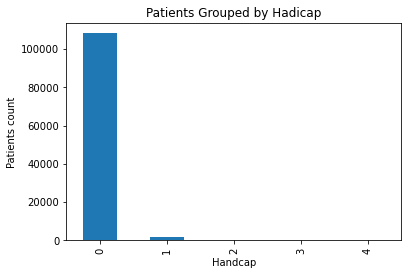

In [76]:
# Grouping by handcap
df.groupby(['Handcap'])['Noshow'].count().plot(kind = 'bar').set_ylabel('Patients count')
mpl.title('Patients Grouped by Hadicap');

### Chart Description

The upper bar chart displays the patients who has handicap, and it shows that most of the pateints are having handicap are not big sector compared to the total patients

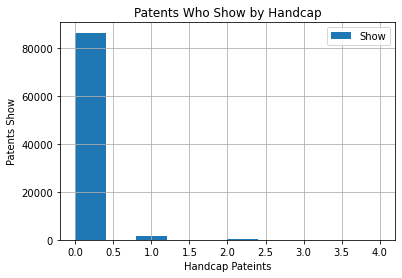

In [82]:
df.Handcap[show].hist(label = 'Show');
mpl.title('Patents Who Show by Handcap')
mpl.xlabel('Handcap Pateints')
mpl.ylabel('Patents Show')
mpl.legend();

### Chart Description

The upper histogram displays the patients Handcap and how it affects the patients to show for their appointments, and it shows that most of the pateints who are ahndcap are committed to their appointments.

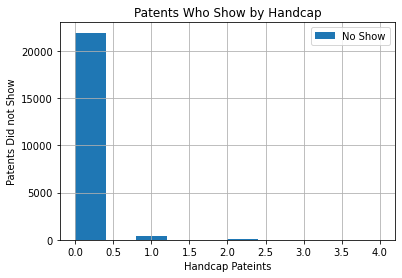

In [81]:
df.Handcap[noshow].hist(label = 'No Show');
mpl.title('Patents Who Show by Handcap')
mpl.xlabel('Handcap Pateints')
mpl.ylabel('Patents Did not Show')
mpl.legend();

### Chart Description

The upper histogram displays the patients Handcap and how it affects the patients to show for their appointments, and it shows that most of the pateints who are handcap and not showing for the appointment are low.

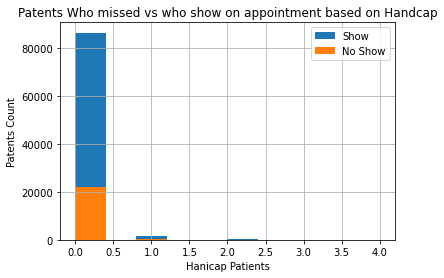

In [80]:
# Compare if the patient is handcap and how it affects the patient to show up
df.Handcap[show].hist(label = 'Show');
df.Handcap[noshow].hist(label = 'No Show');
mpl.title('Patents Who missed vs who show on appointment based on Handcap')
mpl.xlabel('Hanicap Patients')
mpl.ylabel('Patents Count')
mpl.legend();

### Chart Description

The upper histogram displays the Patents Who missed their appointment vs who show on appointment, and it combines the last two charts and that to compare the resutls of the pateints, and that shows that pateints who are handcap and not showing for the appointment are low compared to the ones who show for the appointment.

<a id='limit'></a>
## Limitations

In this project we analyzed  the data of No-Show Appointments 'noshowappointments_may-2016.csv' dataset, I found some stuff that would have been more helpful if it was avaiable such as:
* The Data includes 110,527 sample, and it is good but not enough to represent the population.
* The ScheduledDay and the AppointmentDay should have been datetime type that was going to help to compare.
* Coulumns like scholarship is not a factor as it doesnot affect the patient to show for the appointment or not.
* The data types of Hipertension, Diabetes, Alcoholism, SMS_received, and No-show would have been easier to work with if they were boolean.
* It would be better to name the columns without the sign (-) instead (_) should be used to avoid code typing errors.
* There should be afeild of the profession that would help track the commiment of attending way better.  

<a id='conclusions'></a>

## Conclusion
From this analysis we can find the following:
* The patients who didn’t received SMS were the most patients to show, and that means that the SMS was not something to count on to make the patients show on their appointments, but I think the reason for that is that the pateints receives the SMS to confirm their appointments, but we can improve that and it would be very helpful to send them another SMS as a reminder before the appointment with couple of hours or aday before.

* The patients who are most committed to attend on their appoinment are the parents because as the analisis show the babies and the childreen are the highest sector to be committed to show, and that reflects the importance of that sector of patients.
* The ages between 38 and 70 are the most sector of coming to their appointments of the adults and that would tell that these average of ages suffers from serious injeries of sickness.
* The age between  21 and about 35 are the most patients to miss their appointments, this would reflect that thier injeries or sickness is not so serious in this average of ages, and it would be because the averages of ages is way busy because these are thages of youth and hard work.
* As for my opinion one of the most important factors in thi analysis is the age.

* The patients who are enrolled to the scholarship are mostly commited to attend more than missing, although the percentage of persons enrolled are very low, but in my opinion the scholrship variable is not helpful beacuse in my opinion it is not related or affecting on the patients to show for their appointments.

* The most of handicap patients mostly are not missing their appointments, although they were a small sector, but the data analysis shows that comaring them, they do not miss their appointments much, and that would be for the care that is available for them (someone takes care od them), and another reason is their serious cases, so they mostly commited to show.

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [78]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1